## Hands-on Workshop 
## Building Airbnb Solution with Azure ML and MLflow

## Setup Project Workspace

Azure ML:  
[Workspace](https://docs.microsoft.com/en-us/python/api/azureml-core/azureml.core.workspace.workspace?view=azure-ml-py) class definition

In [0]:
import azureml.core
from azureml.core import Workspace
import pandas as pd

from azureml.core.authentication import ServicePrincipalAuthentication

sp = ServicePrincipalAuthentication(tenant_id="72f988bf-86f1-41af-91ab-2d7cd011db47", # tenantID
                                    service_principal_id="2cfbcca2-c1a0-4e4a-a43e-2ac27f068242", # clientId
                                    service_principal_password = dbutils.secrets.get(scope = 'karenkeyvault', key = 'sp-example-app-karenku-secret')
                                   )
# sepcficy workspace using current active config
subscription_id = '09ba1f2e-4799-434c-9f88-6ca60b368ac8'
resource_group = 'mlservicedemo'
workspace_name = 'mlservicedemo'

workspace = Workspace(subscription_id, resource_group, workspace_name, auth = sp)

## MLfow connect Azure ML

In [0]:
import mlflow

uri = workspace.get_mlflow_tracking_uri()
mlflow.set_tracking_uri(uri)


## Securely Access Shared Data via Datastore & Dataset

Azure ML:  
[Datastore](https://docs.microsoft.com/en-us/python/api/azureml-core/azureml.core.datastore) class definition    
[Dataset](https://docs.microsoft.com/en-us/python/api/azureml-core/azureml.core.dataset) class definition

In [0]:
from azureml.core import Datastore

# get a named datastore from the current workspace
datastore_name = 'chikustoragebb'
datastore = Datastore.get(workspace, datastore_name=datastore_name)

# list all registered datastores in current workspace
if not datastore_name:
    for name, datastore in ws.datastores.items():
        print(name, datastore.datastore_type)

print(datastore)

{
 "name": "chikustoragebb",
 "container_name": "amldata",
 "account_name": "storageblobdatabrick",
 "protocol": "https",
 "endpoint": "core.windows.net"
}

In [0]:
!pip install azureml-dataset-runtime --upgrade

from azureml.core import Dataset

# get the dataset with specified version
dataset_name = 'airbnb_clean'
dataset_version = 1
dataset = Dataset.get_by_name(workspace=workspace, name=dataset_name, version=dataset_version)

# store it into pandas DF
df = dataset.to_pandas_dataframe()
df

Requirement already satisfied: azureml-dataset-runtime in /databricks/python3/lib/python3.8/site-packages (1.40.0)
Requirement already satisfied: numpy!=1.19.3 in /databricks/python3/lib/python3.8/site-packages (from azureml-dataset-runtime) (1.19.2)
Requirement already satisfied: azureml-dataprep<3.1.0a,>=3.0.0a in /databricks/python3/lib/python3.8/site-packages (from azureml-dataset-runtime) (3.0.2)
Requirement already satisfied: pyarrow<4.0.0,>=0.17.0 in /databricks/python3/lib/python3.8/site-packages (from azureml-dataset-runtime) (3.0.0)
Requirement already satisfied: azure-identity==1.7.0 in /databricks/python3/lib/python3.8/site-packages (from azureml-dataprep<3.1.0a,>=3.0.0a->azureml-dataset-runtime) (1.7.0)
Requirement already satisfied: azureml-dataprep-rslex~=2.4.0dev0 in /databricks/python3/lib/python3.8/site-packages (from azureml-dataprep<3.1.0a,>=3.0.0a->azureml-dataset-runtime) (2.4.3)
Requirement already satisfied: cloudpickle<3.0.0,>=1.1.0 in /databricks/python3/lib/python3.8/site-packages (from azureml-dataprep<3.1.0a,>=3.0.0a->azureml-dataset-runtime) (1.6.0)
Requirement already satisfied: dotnetcore2<3.0.0,>=2.1.14 in /databricks/python3/lib/python3.8/site-packages (from azureml-dataprep<3.1.0a,>=3.0.0a->azureml-dataset-runtime) (2.1.23)
Requirement already satisfied: azureml-dataprep-native<39.0.0,>=38.0.0 in /databricks/python3/lib/python3.8/site-packages (from azureml-dataprep<3.1.0a,>=3.0.0a->azureml-dataset-runtime) (38.0.0)
Requirement already satisfied: msal<2.0.0,>=1.12.0 in /databricks/python3/lib/python3.8/site-packages (from azure-identity==1.7.0->azureml-dataprep<3.1.0a,>=3.0.0a->azureml-dataset-runtime) (1.17.0)
Requirement already satisfied: six>=1.12.0 in /databricks/python3/lib/python3.8/site-packages (from azure-identity==1.7.0->azureml-dataprep<3.1.0a,>=3.0.0a->azureml-dataset-runtime) (1.15.0)
Requirement already satisfied: cryptography>=2.5 in /databricks/python3/lib/python3.8/site-packages (from azure-identity==1.7.0->azureml-dataprep<3.1.0a,>=3.0.0a->azureml-dataset-runtime) (3.4.7)
Requirement already satisfied: msal-extensions~=0.3.0 in /databricks/python3/lib/python3.8/site-packages (from azure-identity==1.7.0->azureml-dataprep<3.1.0a,>=3.0.0a->azureml-dataset-runtime) (0.3.1)
Requirement already satisfied: azure-core<2.0.0,>=1.11.0 in /databricks/python3/lib/python3.8/site-packages (from azure-identity==1.7.0->azureml-dataprep<3.1.0a,>=3.0.0a->azureml-dataset-runtime) (1.21.1)
Requirement already satisfied: requests>=2.18.4 in /databricks/python3/lib/python3.8/site-packages (from azure-core<2.0.0,>=1.11.0->azure-identity==1.7.0->azureml-dataprep<3.1.0a,>=3.0.0a->azureml-dataset-runtime) (2.25.1)
Requirement already satisfied: cffi>=1.12 in /databricks/python3/lib/python3.8/site-packages (from cryptography>=2.5->azure-identity==1.7.0->azureml-dataprep<3.1.0a,>=3.0.0a->azureml-dataset-runtime) (1.14.5)
Requirement already satisfied: pycparser in /databricks/python3/lib/python3.8/site-packages (from cffi>=1.12->cryptography>=2.5->azure-identity==1.7.0->azureml-dataprep<3.1.0a,>=3.0.0a->azureml-dataset-runtime) (2.20)
Requirement already satisfied: distro>=1.2.0 in /usr/lib/python3/dist-packages (from dotnetcore2<3.0.0,>=2.1.14->azureml-dataprep<3.1.0a,>=3.0.0a->azureml-dataset-runtime) (1.4.0)
Requirement already satisfied: PyJWT[crypto]<3,>=1.0.0 in /databricks/python3/lib/python3.8/site-packages (from msal<2.0.0,>=1.12.0->azure-identity==1.7.0->azureml-dataprep<3.1.0a,>=3.0.0a->azureml-dataset-runtime) (2.3.0)
Requirement already satisfied: portalocker<3,>=1.0 in /databricks/python3/lib/python3.8/site-packages (from msal-extensions~=0.3.0->azure-identity==1.7.0->azureml-dataprep<3.1.0a,>=3.0.0a->azureml-dataset-runtime) (2.4.0)
Requirement already satisfied: certifi>=2017.4.17 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.18.4->azure-core<2.0.0,>=1.11.0->azure-identity==1.7.0->azureml-dataprep<3.1.0a,>=3.0.0a->azureml-dataset-runtime) (202

,host_total_listings_count,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
0,1.0,0,0,37.769310,-122.433856,0,0,3.0,1.0,1.0,2.0,0,1.0,127.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,170.0
1,2.0,1,1,37.745112,-122.421018,0,0,5.0,1.0,2.0,3.0,0,30.0,112.0,98.0,10.0,10.0,10.0,10.0,10.0,9.0,235.0
2,10.0,2,0,37.766690,-122.452505,0,1,2.0,4.0,1.0,1.0,0,32.0,17.0,85.0,8.0,8.0,9.0,9.0,9.0,8.0,65.0
3,4.0,3,2,37.730746,-122.448409,1,1,1.0,2.0,1.0,1.0,0,3.0,76.0,95.0,9.0,9.0,10.0,10.0,9.0,9.0,60.0
4,10.0,2,0,37.764872,-122.451828,1,1,2.0,4.0,1.0,1.0,0,32.0,7.0,91.0,9.0,9.0,9.0,9.0,9.0,9.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4702,3.0,4,12,37.769069,-122.422581,0,0,6.0,1.0,2.0,3.0,0,2.0,0.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,250.0
4703,6.0,3,26,37.708212,-122.455345,1,1,4.0,2.0,1.0,2.0,0,1.0,0.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,82.0
4704,6.0,3,26,37.708333,-122.456090,1,1,3.0,2.0,1.0,2.0,0,1.0,0.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,75.0
4705,6.0,3,26,37.708689,-122.456545,1,1,2.0,2.0,1.0,1.0,0,1.0,0.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,63.0


**Azure Data Profiler**
Suited for big dataset leveraging the power of scalable clustered compute

* see Azure ML Studio UI Datasets for "Generate Data Profile"
* alternatively run profiling task using Azure ML Python SDK: [Dataset Profile](https://docs.microsoft.com/en-us/python/api/azureml-core/azureml.data.dataset_profile.datasetprofile) class reference

## Setup Experiment for Tracking & Reproducibility

MLflow :  
[MLflow Tracking](https://www.mlflow.org/docs/latest/tracking.html)
* mlflow.set_experiment()

In [0]:
experimentPath = 'airbnb-sklearn'
mlflow.set_experiment(experimentPath)
exp = mlflow.get_experiment_by_name(name=experimentPath)
exp

Out[21]: <Experiment: artifact_location='', experiment_id='c074a809-554c-4c15-927a-2087830f0a3c', lifecycle_stage='active', name='airbnb-sklearn', tags={}>

## Train on Local Compute Instance

MLflow :  
[MLflow Tracking](https://www.mlflow.org/docs/latest/tracking.html)
* mlflow.sklearn.autolog()
* mlflow.search_runs()

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(["price"], axis=1), df[["price"]].values.ravel(), random_state=42)

def log_rf(experimentID, run_name, params, X_train, X_test, y_train, y_test):
  import os
  import matplotlib.pyplot as plt
  import mlflow.sklearn
  import seaborn as sns
  from sklearn.ensemble import RandomForestRegressor
  
  
  from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
  import tempfile
  from sklearn.preprocessing import StandardScaler
  from sklearn.pipeline import Pipeline
  
  with mlflow.start_run(experiment_id=experimentID, run_name=run_name) as run:
    # Create model, train it, and create predictions
    rf = RandomForestRegressor(**params)
  
    rf.fit(X_train, y_train)
    predictions = rf.predict(X_test)
    
    conda_env = mlflow.sklearn.get_default_conda_env()
#     conda_env['dependencies'].append({'pip': [
#     'joblib',
#     'scikit-learn==0.23.2',
#     'inference-schema[numpy-support]',
#     'mlflow'
#     #... some other dependencies
#     ]})
    
    # Log model
    mlflow.sklearn.log_model(rf, "random-forest-model", conda_env=conda_env)
  

    # Log params
    mlflow.log_params(params)

    # Create metrics
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Log metrics
    mlflow.log_metrics({"dataversion":dataset_version,"mse": mse, "mae": mae, "r2": r2})

    # Create feature importance
    importance = pd.DataFrame(list(zip(df.columns, rf.feature_importances_)),
                                columns=["Feature", "Importance"]
                              ).sort_values("Importance", ascending=False)
    importance_toshow = importance.iloc[0:10]
    
    # Log importances using a temporary file
    temp = tempfile.NamedTemporaryFile(prefix="feature-importance-", suffix=".csv")
    temp_name = temp.name
    try:
      importance.to_csv(temp_name, index=False)
      mlflow.log_artifact(temp_name, "feature-importance.csv")
    finally:
      temp.close() # Delete the temp file

    # Create plot
    fig, ax = plt.subplots()

    importance_toshow.plot.bar(ax=ax)
    plt.xlabel("Predicted values for Price ($)")
    plt.ylabel("Residual")
    plt.title("Residual Plot")

    # Log residuals using a temporary file
    temp = tempfile.NamedTemporaryFile(prefix="residuals-", suffix=".png")
    temp_name = temp.name
    try:
      fig.savefig(temp_name)
      mlflow.log_artifact(temp_name, "residuals.png")
    finally:
      temp.close() # Delete the temp file

    display(fig)
    return run.info.run_id

In [0]:
# experimentPath = 'airbnb-sklearn-auto-log'
# mlflow.set_experiment(experimentPath)
# experimentID= mlflow.get_experiment_by_name(name=experimentPath).experiment_id


# import mlflow

# from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_diabetes
# from sklearn.ensemble import RandomForestRegressor

# mlflow.autolog()
# X_train, X_test, y_train, y_test = train_test_split(df.drop(["price"], axis=1), df[["price"]].values.ravel(), random_state=42)

# # Create and train models.
# rf = RandomForestRegressor(n_estimators = 100, max_depth = 6, max_features = 3)
# rf.fit(X_train, y_train)

# # Use the model to make predictions on the test dataset.
# predictions = rf.predict(X_test)
# autolog_run = mlflow.last_active_run()

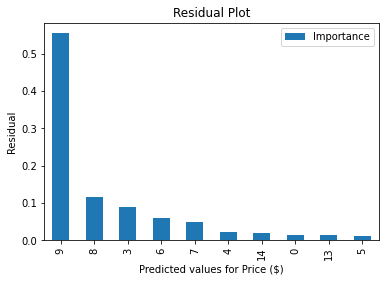

In [0]:
import pandas as pd
params = {
  "n_estimators": 350,
  "max_depth": 6,
  "random_state": 42
}

run_id = log_rf(experimentID, "2st Run", params, X_train, X_test, y_train, y_test)

In [0]:
# features Importances
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(**params)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
feature_importances = pd.DataFrame(rf.feature_importances_, index=X_train.columns.tolist(), columns=['importance'])
features = feature_importances.sort_values('importance', ascending=False).iloc[0:10]
features


Out[20]:

,importance
bedrooms,0.595272
bathrooms,0.121899
latitude,0.080257
room_type,0.062395
accommodates,0.049001
review_scores_rating,0.014005
host_total_listings_count,0.013926
longitude,0.011508
property_type,0.009750
number_of_reviews,0.008567


## Register Best Model

* For asset tracking, sharing and reproducibility
* This part shows registering any arbitrarily generated models (not limited by runs or experiments)

MLflow :  
[MLflow Model-API](https://mlflow.org/docs/latest/models.html#model-api)  
* [SKlearn](https://mlflow.org/docs/latest/python_api/mlflow.sklearn.html#)
* [Xgboost](https://mlflow.org/docs/latest/python_api/mlflow.xgboost.html#)

Azure ML :  
[Model](https://docs.microsoft.com/en-us/python/api/azureml-core/azureml.core.model) class reference

#### (1) Fetch Run Information

In [0]:
all_runs = mlflow.search_runs(max_results=10)  # Note : This is pandas dataframe
display(all_runs)

run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.mae,metrics.training_mae,metrics.training_r2_score,metrics.mean_absolute_error_X_test,metrics.dataversion,metrics.r2,metrics.training_rmse,metrics.mean_squared_error_X_test,metrics.training_mse,metrics.training_score,metrics.mse,metrics.r2_score_X_test,params.oob_score,params.bootstrap,params.random_state,params.verbose,params.criterion,params.min_samples_split,params.warm_start,params.min_weight_fraction_leaf,params.max_leaf_nodes,params.min_impurity_split,params.n_jobs,params.ccp_alpha,params.min_samples_leaf,params.max_depth,params.min_impurity_decrease,params.max_samples,params.n_estimators,params.max_features,tags.mlflow.rootRunId,tags.mlflow.user,tags.mlflow.databricks.cluster.id,tags.mlflow.databricks.notebook.commandID,tags.mlflow.source.name,tags.mlflow.databricks.notebookPath,tags.mlflow.runName,tags.estimator_class,tags.mlflow.databricks.notebookID,tags.mlflow.source.type,tags.mlflow.databricks.webappURL,tags.estimator_name
9693aeec-c016-42f9-9c6b-dcff91544678,c074a809-554c-4c15-927a-2087830f0a3c,FINISHED,,2022-04-19T03:23:52.969+0000,2022-04-19T03:24:14.818+0000,52.32914836225345,49.491330479700395,0.7367738909848431,52.32914836225345,1.0,0.6733650133499325,76.15349152206936,6689.401662590501,5799.35427100189,0.7367738909848431,6689.401662590501,0.6733650133499325,False,True,42,0,mse,2,False,0.0,None,None,None,0.0,1,6,0.0,None,200,auto,9693aeec-c016-42f9-9c6b-dcff91544678,root,0322-021538-lp9ds1w4,6754810754140054282_5219028216324629655_e458a4a4c2614d00a85fa2d5ebe00bfc,/MLOPs(AML)/mlflow-airbnb-draft,/MLOPs(AML)/mlflow-airbnb-draft,3rd Run,sklearn.ensemble._forest.RandomForestRegressor,2441265505024458,NOTEBOOK,https://westus.azuredatabricks.net,RandomForestRegressor
aa8b4574-6707-443b-93f4-8a9d87b348a8,c074a809-554c-4c15-927a-2087830f0a3c,FINISHED,,2022-04-19T03:24:26.895+0000,2022-04-19T03:24:47.843+0000,52.32914836225345,49.491330479700395,0.7367738909848431,52.32914836225345,1.0,0.6733650133499325,76.15349152206936,6689.401662590501,5799.35427100189,0.7367738909848431,6689.401662590501,0.6733650133499325,False,True,42,0,mse,2,False,0.0,None,None,None,0.0,1,6,0.0,None,200,auto,aa8b4574-6707-443b-93f4-8a9d87b348a8,root,0322-021538-lp9ds1w4,6754810754140054282_5173285414384766009_00f1de752ed147a585503188eb6124b7,/MLOPs(AML)/mlflow-airbnb-draft,/MLOPs(AML)/mlflow-airbnb-draft,3rd Run,sklearn.ensemble._forest.RandomForestRegressor,2441265505024458,NOTEBOOK,https://westus.azuredatabricks.net,RandomForestRegressor
3efa7409-8fac-4ba6-9dd9-3822c6102db3,c074a809-554c-4c15-927a-2087830f0a3c,FINISHED,,2022-04-19T03:27:38.944+0000,2022-04-19T03:28:00.638+0000,52.32914836225345,49.491330479700395,0.7367738909848431,52.32914836225345,1.0,0.6733650133499325,76.15349152206936,6689.401662590501,5799.35427100189,0.7367738909848431,6689.401662590501,0.6733650133499325,False,True,42,0,mse,2,False,0.0,None,None,None,0.0,1,6,0.0,None,200,auto,3efa7409-8fac-4ba6-9dd9-3822c6102db3,root,0322-021538-lp9ds1w4,6754810754140054282_6400149730713166306_9c0dd123ce70482a966c06d90c6ea6e1,/MLOPs(AML)/mlflow-airbnb-draft,/MLOPs(AML)/mlflow-airbnb-draft,,sklearn.ensemble._forest.RandomForestRegressor,2441265505024458,NOTEBOOK,https://westus.azuredatabricks.net,RandomForestRegressor
45c245df-be24-4801-a6e6-cd09ce799132,c074a809-554c-4c15-927a-2087830f0a3c,FINISHED,,2022-04-19T09:34:46.626+0000,2022-04-19T09:34:56.778+0000,null,null,null,null,null,null,null,null,null,null,null,null,null,null,42,null,null,null,null,null,null,null,null,null,null,6,null,null,200,null,45c245df-be24-4801-a6e6-cd09ce799132,root,0322-021538-lp9ds1w4,4152427460467605116_6515187577076344927_80c898043a8b40a0991c476689a4544a,/MLOPs(AML)/mlflow-airbnb-draft,/MLOPs(AML)/mlflow-airbnb-draft,baseline Run,null,2441265505024458,NOTEBOOK,https://westus.azuredatabricks.net,null
e13fde4a-c239-4337-9a40-a17f8d039f59,c074a809-554c-4c15-927a-2087830f0a3c,FINISHED,,2022-04-19T09:34:59.707+0000,2022-04-19T09:35:08.939+0000,

In [0]:
best_run = mlflow.search_runs(order_by=['metrics.mse asc']).iloc[0]
print(f'mse of Best Run {best_run["run_id"]} : {best_run["metrics.mse"]}')

mse of Best Run 9693aeec-c016-42f9-9c6b-dcff91544678 : 6689.401662590501

#### (2) Fetch Model Artifacts

In [0]:
import pandas as pd

run_id = '9693aeec-c016-42f9-9c6b-dcff91544678'
model_path = 'model'
model_uri = f'runs:/{run_id}/{model_path}'
print(model_uri)

import mlflow

# Load model as a PyFuncModel.
loaded_model = mlflow.sklearn.load_model(model_uri)
# loaded_model.predict(pd.DataFrame(X_test))

# Save model to local
mlflow.sklearn.save_model(loaded_model, './mymodel1', serialization_format=mlflow.sklearn.SERIALIZATION_FORMAT_PICKLE)
  

runs:/9693aeec-c016-42f9-9c6b-dcff91544678/model

--------------------------------------------------------------------------- 
 RestException Traceback (most recent call last)
 <command-2441265505024477> in <module> 
 7 
 8 # Load model as a PyFuncModel. 
 ----> 9 loaded_model = mlflow . sklearn . load_model ( model_uri ) 
 10 
 11 # Save model to local 

 /databricks/python/lib/python3.8/site-packages/mlflow/sklearn/__init__.py in load_model (model_uri) 
 469 predictions = sk_model . predict ( pandas_df ) 
 470 """
 --> 471 local_model_path = _download_artifact_from_uri ( artifact_uri = model_uri ) 
 472 flavor_conf = _get_flavor_configuration ( model_path = local_model_path , flavor_name = FLAVOR_NAME ) 
 473 sklearn_model_artifacts_path = os . path . join ( local_model_path , flavor_conf [ "pickled_model" ] ) 

 /databricks/python/lib/python3.8/site-packages/mlflow/tracking/artifact_utils.py in _download_artifact_from_uri (artifact_uri, output_path) 
 81 root_uri = prefix + urllib . parse . urlunparse ( parsed_uri ) 
 82 
 ---> 83 return get_artifact_repository(artifact_uri=root_uri).download_artifacts(
 84 artifact_path = artifact_path , dst_path = output_path
 85 )

 /databricks/python/lib/python3.8/site-packages/mlflow/store/artifact/artifact_repository_registry.py in get_artifact_repository (artifact_uri) 
 100 requirements . 
 101 """
 --> 102 return _artifact_repository_registry . get_artifact_repository ( artifact_uri ) 

 /databricks/python/lib/python3.8/site-packages/mlflow/store/artifact/artifact_repository_registry.py in get_artifact_repository (self, artifact_uri) 
 69 )
 70 )
 ---> 71 return repository ( artifact_uri ) 
 72 
 73 

 /databricks/python/lib/python3.8/site-packages/mlflow/store/artifact/runs_artifact_repo.py in __init__ (self, artifact_uri) 
 24 
 25 super ( ) . __init__ ( artifact_uri ) 
 ---> 26 uri = RunsArtifactRepository . get_underlying_uri ( artifact_uri ) 
 27 self . repo = get_artifact_repository ( uri ) 
 28 

 /databricks/python/lib/python3.8/site-packages/mlflow/store/artifact/runs_artifact_repo.py in get_underlying_uri (runs_uri) 
 37 ( run_id , artifact_path ) = RunsArtifactRepository . parse_runs_uri ( runs_uri ) 
 38 tracking_uri = get_databricks_profile_uri_from_artifact_uri ( runs_uri ) 
 ---> 39 uri = get_artifact_uri ( run_id , artifact_path , tracking_uri ) 
 40 assert not RunsArtifactRepository . is_runs_uri ( uri ) # avoid an infinite loop 
 41 return add_databricks_profile_info_to_artifact_uri ( uri , tracking_uri ) 

 /databricks/python/lib/python3.8/site-packages/mlflow/tracking/artifact_utils.py in get_artifact_uri (run_id, artifact_path, tracking_uri) 
 45 
 46 store = _get_store ( tracking_uri ) 
 ---> 47 run = store . get_run ( run_id ) 
 48 # Maybe move this method to RunsArtifactRepository so the circular dependency is clearer. 
 49 assert urllib . parse . urlparse ( run . info . artifact_uri ) . scheme != "runs" # avoid an infinite loop 

 /databricks/python/lib/python3.8/site-packages/mlflow/store/tracking/rest_store.py in get_run (self, run_id) 
 130 """
 131 req_body = message_to_json ( GetRun ( run_uuid = run_id , run_id = run_id ) ) 
 --> 132 response_proto = self . _call_endpoint ( GetRun , req_body ) 
 133 return Run . from_proto ( response_proto . run ) 
 134 

 /databricks/python/lib/python3.8/site-packages/mlflow/store/tracking/rest_store.py in _call_endpoint (self, api, json_body) 
 54 endpoint , method = _METHOD_TO_INFO [ api ] 
 55 response_proto = api . Response ( ) 
 ---> 56 return call_endpoint ( self . get_host_creds ( ) , endpoint , method , json_body , response_proto ) 
 57 
 58 def list_experiments(

 /databricks/python/lib/python3.8/site-packages/mlflow/utils/rest_utils.py in call_endpoint (host_creds, endpoint, method, json_body, response_proto) 
 215 host_creds = host_creds , endpoint = endpoint , method = method , json = json_body
 216 )
 --> 217 response = verify_rest_response ( response , endpoint ) 
 218 js_dict = json . loads ( response . text ) 
 219 parse_dict ( js_dict = js_dict , mes

In [0]:
%sh ls /databricks/driver/mymodel1

**register model**

In [0]:

from azureml.core.model import Model

model = Model.register(model_path ='./mymodel1/model.pkl',
                       model_name="airbnb-sklearn-model",
                       tags ={"run_id" : run_id }, #mlflow run ID 設定
                       workspace=workspace)

# retrieve model
model = Model(workspace, 'airbnb-sklearn-model') 
model

Error, provided model path "./mymodel1/model.pkl" cannot be found

--------------------------------------------------------------------------- 
 WebserviceException Traceback (most recent call last)
 <command-4161126541696206> in <module> 
 2 from azureml . core . model import Model
 3 
 ----> 4 model = Model.register(model_path ='./mymodel1/model.pkl',
 5 model_name = "airbnb-sklearn-model" , 
 6 tags = { "run_id" : run_id } , #mlflow run ID 設定 

 /databricks/python/lib/python3.8/site-packages/azureml/core/model.py in register (workspace, model_path, model_name, tags, properties, description, datasets, model_framework, model_framework_version, child_paths, sample_input_dataset, sample_output_dataset, resource_configuration) 
 582 logger=module_logger)
 583 
 --> 584 Model . _validate_model_path ( model_path , child_paths ) 
 585 
 586 asset = Model . _create_asset ( workspace . service_context , model_path , model_name , child_paths ) 

 /databricks/python/lib/python3.8/site-packages/azureml/core/model.py in _validate_model_path (model_path, child_paths) 
 645 """
 646 if not os . path . exists ( model_path ) : 
 --> 647 raise WebserviceException('Error, provided model path "{}" cannot be found'.format(model_path),
 648 logger=module_logger)
 649 

 WebserviceException : WebserviceException:
	Message: Error, provided model path "./mymodel1/model.pkl" cannot be found
	InnerException None
	ErrorResponse 
{
 "error": {
 "message": "Error, provided model path \"./mymodel1/model.pkl\" cannot be found"
 }
}

In [0]:
%sh ls /databricks/driver/mymodel1

MLmodel
conda.yaml
model.pkl
requirements.txt

#### (3) Fetch build environment definition (YAML)

**Define Environment ( model package and docker ) via YAML**

In [0]:
# conda_env = mlflow.sklearn.get_default_conda_env()
# conda_env

In [0]:
# %%writefile conda_environment_train.yml

# dependencies:
# - python=3.8.1
# - pip:
#   - azureml-dataset-runtime[pandas,fuse]
#   - azureml-defaults
#   - imutils==0.5.3
#   - numpy==1.18.5
#   - scikit-learn==0.22
#   - inference-schema
# - conda:
#   - py-xgboost<=0.90

In [0]:
# from azureml.core import Environment
# reuse build environment from earlier steps 
# env = Environment.from_conda_specification(name='xgboost-train-env', file_path='./conda_environment_train.yml')
# register env for reuse
# env.register(workspace)


In [0]:
# %%writefile conda_environment_train.yml

dependencies:
- python=3.8.1
- pip:
  - azureml-dataset-runtime[pandas,fuse]
  - azureml-defaults
  - imutils==0.5.3
  - numpy==1.18.5
  - scikit-learn==0.22
  - inference-schema
- conda:
  - py-xgboost<=0.90


In [0]:
from azureml.core import Environment
from azureml.core.conda_dependencies import CondaDependencies

# get env from existing Environment
# env = Environment.get(workspace=workspace, 
#                       name="AzureML-sklearn-0.24.1-ubuntu18.04-py37-cpu-inference", 
#                       version=1)
# env


# add custom pip / conda dependencies on-the-fly
env = Environment('sklearn-train-env')

env.python.conda_dependencies = CondaDependencies.create(
    pip_packages=[
        'azureml-defaults==1.37.0',
        'azureml-interpret==1.37.0',
        'azureml-train-automl-runtime==1.37.0',
        'inference-schema',
        'numpy>=1.16.0,<1.19.0',
        'pandas==1.1.5',
        'scikit-learn==0.22',
    ])
# register env for reuse
env.register(workspace)


Out[11]: {
 "databricks": {
 "eggLibraries": [],
 "jarLibraries": [],
 "mavenLibraries": [],
 "pypiLibraries": [],
 "rcranLibraries": []
 },
 "docker": {
 "arguments": [],
 "baseDockerfile": null,
 "baseImage": "mcr.microsoft.com/azureml/openmpi3.1.2-ubuntu18.04:20220412.v1",
 "baseImageRegistry": {
 "address": null,
 "password": null,
 "registryIdentity": null,
 "username": null
 },
 "enabled": false,
 "platform": {
 "architecture": "amd64",
 "os": "Linux"
 },
 "sharedVolumes": true,
 "shmSize": null
 },
 "environmentVariables": {
 "EXAMPLE_ENV_VAR": "EXAMPLE_VALUE"
 },
 "inferencingStackVersion": null,
 "name": "sklearn-train-env",
 "python": {
 "baseCondaEnvironment": null,
 "condaDependencies": {
 "channels": [
 "anaconda",
 "conda-forge"
 ],
 "dependencies": [
 "python=3.6.2",
 {
 "pip": [
 "azureml-defaults~=1.41.0",
 "azureml-interpret~=1.41.0",
 "azureml-train-automl-runtime~=1.41.0",
 "inference-schema",
 "numpy>=1.16.0,<1.19.0",
 "pandas==1.1.5",
 "scikit-learn==0.22"
 ]
 }
 ],
 "name": "project_environment"
 },
 "condaDependenciesFile": null,
 "interpreterPath": "python",
 "userManagedDependencies": false
 },
 "r": null,
 "spark": {
 "packages": [],
 "precachePackages": true,
 "repositories": []
 },
 "version": "4"
}

In [0]:
env = Environment.get(workspace=workspace, 
                      name="AzureML-sklearn-0.24.1-ubuntu18.04-py37-cpu-inference", 
                      version=1)
env

Out[12]: {
 "databricks": {
 "eggLibraries": [],
 "jarLibraries": [],
 "mavenLibraries": [],
 "pypiLibraries": [],
 "rcranLibraries": []
 },
 "docker": {
 "arguments": [],
 "baseDockerfile": "FROM mcr.microsoft.com/azureml/sklearn-0.24.1-ubuntu18.04-py37-cpu-inference:20210517.v3",
 "baseImage": null,
 "baseImageRegistry": {
 "address": null,
 "password": null,
 "registryIdentity": null,
 "username": null
 },
 "enabled": false,
 "platform": {
 "architecture": "amd64",
 "os": "Linux"
 },
 "sharedVolumes": true,
 "shmSize": null
 },
 "environmentVariables": {
 "EXAMPLE_ENV_VAR": "EXAMPLE_VALUE"
 },
 "inferencingStackVersion": null,
 "name": "AzureML-sklearn-0.24.1-ubuntu18.04-py37-cpu-inference",
 "python": {
 "baseCondaEnvironment": null,
 "condaDependencies": {
 "channels": [
 "anaconda",
 "conda-forge"
 ],
 "dependencies": [
 "python=3.6.2",
 {
 "pip": [
 "azureml-defaults==1.29.0"
 ]
 }
 ],
 "name": "project_environment"
 },
 "condaDependenciesFile": null,
 "interpreterPath": "python",
 "userManagedDependencies": true
 },
 "r": null,
 "spark": {
 "packages": [],
 "precachePackages": true,
 "repositories": []
 },
 "version": "1"
}

In [0]:
# Specify docker steps as a string. 
# dockerfile = r"""
# FROM mcr.microsoft.com/azureml/openmpi3.1.2-ubuntu18.04
# RUN echo "Hello from custom container!"
# """

# # Set base image to None, because the image is defined by dockerfile.
# myenv.docker.base_image = None
# myenv.docker.base_dockerfile = dockerfile

# # Alternatively, load the string from a file.
# myenv.docker.base_image = None
# myenv.docker.base_dockerfile = "./Dockerfile"

#### (4) Fetch Scoring Function (score.py)
**Define Inference Scoring Function `score.py` (and Inference Schema)**

In [0]:
df.head(1)

Out[83]:

,host_total_listings_count,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
0,1.0,0,0,37.76931,-122.433856,0,0,3.0,1.0,1.0,2.0,0,1.0,127.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,170.0


In [0]:
%%writefile score.py
import json
import numpy as np
import pandas as pd
import os
import pickle
import joblib

from inference_schema.schema_decorators import input_schema, output_schema
from inference_schema.parameter_types.standard_py_parameter_type import StandardPythonParameterType
from inference_schema.parameter_types.numpy_parameter_type import NumpyParameterType
from inference_schema.parameter_types.pandas_parameter_type import PandasParameterType

def init():
    global model
    path = os.getenv('AZUREML_MODEL_DIR') 
    model_path = os.path.join(path, 'model.pkl')
    model = joblib.load(model_path)

# 21 columns
input_sample = pd.DataFrame({
    "host_total_listings_count": pd.Series([1.0], dtype="float64"), 
    "neighbourhood_cleansed": pd.Series([0], dtype="int64"), 
    "zipcode": pd.Series([0], dtype="int64"), 
    "latitude": pd.Series([37.76931], dtype="float64"), 
    "longitude": pd.Series([-122.433856], dtype="float64"), 
    "property_type": pd.Series([0], dtype="int64"),  
    "room_type": pd.Series([0], dtype="int64"), 
    "accommodates": pd.Series([3.0], dtype="float64"),
    "bathrooms": pd.Series([1.0], dtype="float64"), 
    "bedrooms": pd.Series([1.0], dtype="float64"), 
    "beds": pd.Series([2.0], dtype="float64"), 
    "bed_type": pd.Series([0], dtype="int64"), 
    "minimum_nights": pd.Series([1.0], dtype="float64"), 
    "number_of_reviews": pd.Series([127.0], dtype="float64"), 
    "review_scores_rating": pd.Series([97.0], dtype="float64"),  
    "review_scores_accuracy": pd.Series([10.0], dtype="float64"),  
    "review_scores_cleanliness": pd.Series([10.0], dtype="float64"), 
    "review_scores_checkin": pd.Series([10.0], dtype="float64"), 
    "review_scores_communication": pd.Series([10.0], dtype="float64"), 
    "review_scores_location": pd.Series([10.0], dtype="float64"), 
    "review_scores_value": pd.Series([10.0], dtype="float64")
    })
output_sample = np.array([170.0])

@input_schema('data', PandasParameterType(input_sample))
@output_schema(NumpyParameterType(output_sample))

def run(data):
    try:
        # Add your custom input data preprocessing steps here...
        result = model.predict(data)
        print(result)
        return result.tolist()
    except Exception as e:
        error = str(e)
        return error


Overwriting score.py

In [0]:
df.columns

Out[62]: Index(['host_total_listings_count', 'neighbourhood_cleansed', 'zipcode',
 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'minimum_nights',
 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
 'review_scores_cleanliness', 'review_scores_checkin',
 'review_scores_communication', 'review_scores_location',
 'review_scores_value', 'price'],
 dtype='object')

## Model Build, Package, Release and Deploy (CI/CD) with AzureML

Following is executed using AzureML's built-in MLOps features

* Package all required dependencies, artifacts and model
* Generate docker build file
* Instantiate Flask/Gunicor and Nginx based webservice
* Build images
* Register image and push to private container registry
* Setup target inference compute (ACI/AKS/AzureMLCompute/Databricks)
* Deploy
* Logging and managed endpoint monitoring

**AKS Compute**

In [0]:
from azureml.core.compute import AksCompute, ComputeTarget

aks_cluster_name = "aks-dev-cluster" 
# Create the cluster
aks_target = ComputeTarget(workspace = workspace, 
                                  name = aks_cluster_name)

# Wait for the create process to complete
#aks_target.wait_for_completion(show_output = True)
print(aks_target.provisioning_state)
print(aks_target.provisioning_errors)

Succeeded
None

In [0]:
from azureml.core.model import InferenceConfig, Model
from azureml.core.webservice import AksWebservice
from azureml.core.compute import AksCompute, ComputeTarget

aks_cluster_name = "aks-dev-cluster" 
# Create the cluster
aks_target = ComputeTarget(workspace = workspace, 
                                  name = aks_cluster_name)

# Wait for the create process to complete
#aks_target.wait_for_completion(show_output = True)
print(aks_target.provisioning_state)
print(aks_target.provisioning_errors)

# env = Environment('sklearn-train-env')

# env.python.conda_dependencies = CondaDependencies.create(
#     pip_packages=[
#         'azureml-defaults==1.37.0',
#         'azureml-interpret==1.37.0',
#         'azureml-train-automl-runtime==1.37.0',
#         'inference-schema',
#         'numpy>=1.16.0,<1.19.0',
#         'pandas==0.25.1',
#         'scikit-learn==0.24'
#     ])
env = Environment.get(workspace=workspace, 
                      name="sklearn-train-env", 
                      version=1)
#  
# env = Environment.get(workspace=workspace, 
#                       name="AzureML-sklearn-0.24.1-ubuntu18.04-py37-cpu-inference", 
#                       version=1)

# Web service name
prod_webservice_name = "airbnb-sklearn-model-test1"

# load model registry
model = Model(workspace, 'airbnb-sklearn-model') #可以設定獲取版本版本

# Combine scoring script & environment in Inference configuration
inference_config = InferenceConfig(entry_script="./score.py", environment=env)
# inference_config = InferenceConfig(runtime= "python", entry_script="score.py", conda_file="myenv.yml")

# Set deployment configuration
# deployment_config = AciWebservice.deploy_configuration(cpu_cores = 1, memory_gb = 1)
prod_webservice_deployment_config = AksWebservice.deploy_configuration()

prod_webservice = Model.deploy(workspace = workspace, 
                                    name = prod_webservice_name,
                                    models = [model],
                                    inference_config=inference_config,
                                    deployment_config = prod_webservice_deployment_config,
                                    deployment_target = aks_target,
                                    overwrite = True)

prod_webservice.wait_for_deployment(show_output = True)
print(prod_webservice.state)

Succeeded
None
Tips: You can try get_logs(): https://aka.ms/debugimage#dockerlog or local deployment: https://aka.ms/debugimage#debug-locally to debug if deployment takes longer than 10 minutes.
Running
2022-05-02 03:21:54+00:00 Creating Container Registry if not exists.
2022-05-02 03:21:54+00:00 Registering the environment.
2022-05-02 03:21:55+00:00 Use the existing image..
2022-05-02 03:22:03+00:00 Checking the status of deployment airbnb-sklearn-model-test1..
2022-05-02 03:22:36+00:00 Checking the status of inference endpoint airbnb-sklearn-model-test1.
Succeeded
AKS service creation operation finished, operation "Succeeded"
Healthy

In [0]:
from azureml.core.webservice import AksWebservice
wb = AksWebservice(workspace, 'airbnb-sklearn-model-test1')

In [0]:
prod_webservice.get_logs()

Out[10]: '2022-05-01T02:53:57,683209917+00:00 - rsyslog/run \n2022-05-01T02:53:57,684077428+00:00 - gunicorn/run \nDynamic Python package installation is disabled.\nStarting HTTP server\n./run: line 63: exec: gunicorn: not found\n2022-05-01T02:53:57,686998167+00:00 - iot-server/run \n2022-05-01T02:53:57,692807443+00:00 - gunicorn/finish 127 0\n2022-05-01T02:53:57,697386303+00:00 - nginx/run \n2022-05-01T02:53:57,697515704+00:00 - Exit code 127 is not normal. Killing image.\n'

## Inference Unit Test

In [0]:
prod_webservice.get_logs()

Out[81]: '2022-04-19T12:47:27,306088103+00:00 - gunicorn/run \nDynamic Python package installation is disabled.\nStarting HTTP server\n2022-04-19T12:47:27,307515622+00:00 - iot-server/run \n2022-04-19T12:47:27,308148730+00:00 - nginx/run \n2022-04-19T12:47:27,308410233+00:00 - rsyslog/run \nEdgeHubConnectionString and IOTEDGE_IOTHUBHOSTNAME are not set. Exiting...\n2022-04-19T12:47:27,508642015+00:00 - iot-server/finish 1 0\n2022-04-19T12:47:27,514377689+00:00 - Exit code 1 is normal. Not restarting iot-server.\nStarting gunicorn 20.1.0\nListening at: http://127.0.0.1:31311 (12)\nUsing worker: sync\nworker timeout is set to 300\nBooting worker with pid: 42\nSPARK_HOME not set. Skipping PySpark Initialization.\nFailure while loading azureml_run_type_providers. Failed to load entrypoint automl = azureml.train.automl.run:AutoMLRun._from_run_dto with exception (cloudpickle 2.0.0 (/azureml-envs/azureml_893b3b235a88e59fb271fa6746f2f88c/lib/python3.6/site-packages), Requirement.parse(\'cloudpickle<2.0.0,>=1.1.0\'), {\'azureml-dataprep\'}).\nInitializing logger\n2022-04-19 12:47:33,585 | root | INFO | Starting up app insights client\nlogging socket was found. logging is available.\nlogging socket was found. logging is available.\n2022-04-19 12:47:33,585 | root | INFO | Starting up request id generator\n2022-04-19 12:47:33,586 | root | INFO | Starting up app insight hooks\n2022-04-19 12:47:33,586 | root | INFO | Invoking user\'s init function\nno request id,/azureml-envs/azureml_893b3b235a88e59fb271fa6746f2f88c/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.24.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.\n UserWarning)\n\nno request id,/azureml-envs/azureml_893b3b235a88e59fb271fa6746f2f88c/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.24.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.\n UserWarning)\n\n2022-04-19 12:47:34,762 | root | INFO | Users\'s init has completed successfully\n/structure/azureml-app/score.py:7: FutureWarning: MLflow support for Python 3.6 is deprecated and will be dropped in an upcoming release. At that point, existing Python 3.6 workflows that use MLflow will continue to work without modification, but Python 3.6 users will no longer get access to the latest MLflow features and bugfixes. We recommend that you upgrade to Python 3.7 or newer.\n import mlflow\n/azureml-envs/azureml_893b3b235a88e59fb271fa6746f2f88c/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.24.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.\n UserWarning)\n/azureml-envs/azureml_893b3b235a88e59fb271fa6746f2f88c/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.24.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.\n UserWarning)\n2022-04-19 12:47:34,765 | root | INFO | Skipping middleware: dbg_model_info as it\'s not enabled.\n2022-04-19 12:47:34,765 | root | INFO | Skipping middleware: dbg_resource_usage as it\'s not enabled.\nGenerating swagger file: /tmp/tmpo5fq4_g_\n2022-04-19 12:47:34,772 | root | INFO | Scoring timeout setting is not found. Use default timeout: 3600000 ms\n2022-04-19 12:47:45,824 | root | INFO | 200\n127.0.0.1 - - [19/Apr/2022:12:47:45 +0000] "GET /swagger.json HTTP/1.0" 200 4299 "-" "hackney/1.17.4"\n2022-04-19 12:47:55,193 | root | INFO | 200\n127.0.0.1 - - [19/Apr/2022:12:47:55 +0000] "GET /swagger.json HTTP/1.0" 200 4299 "-" "hackney/1.17.4"\n2022-04-19 12:49:38,755 | root | INFO | 200\n127.0.0.1 - - [19/Apr/2022:12:49:38 +0000] "GET /swagger.json HTTP/1.0" 200 4299 "-" "hackney/1.17.4"

In [0]:
import json
import random

# randomly fetch 30 rows from the feature DF as our test dataset
start_row = random.randint(10,1000)
end_row = start_row + 30
test_df = df.loc[:, df.columns != 'price'][start_row:end_row]

# Restful call to ACI model
input_payload = json.dumps({
    'data': test_df.values.tolist()
})

output = prod_webservice.run(input_payload)

print(f'Testing with row {start_row} ~ {end_row}')
print(output)


Testing with row 719 ~ 749
[178.72615047994725, 118.41239751965949, 163.94141224765178, 299.77810135339354, 375.13223468482994, 484.6536914901155, 178.52668698387166, 227.37973781567206, 203.54125588213702, 246.73338753458196, 122.30721867072312, 478.31854735949474, 106.80146145192226, 92.96087096114135, 281.41454667362484, 313.3674512909188, 372.43301251997696, 137.37503163929526, 709.5382379442054, 372.93554159475565, 186.54135162849033, 273.7502366040277, 115.58091081492617, 109.58712085447631, 111.61953201519891, 117.65072172056915, 165.5857839674728, 187.61398683417758, 172.35661539241266, 175.03797074520284]

In [0]:
print(prod_webservice.get_logs())
print(prod_webservice.scoring_uri)
primary, secondary = prod_webservice.get_keys()
print(primary, secondary )

**Packaging Image**

In [0]:
from azureml.core.model import InferenceConfig, Model

env = Environment('sklearn-train-env')

env.python.conda_dependencies = CondaDependencies.create(
    pip_packages=[
        'azureml-defaults==1.37.0',
        'azureml-interpret==1.37.0',
        'azureml-train-automl-runtime==1.37.0',
        'inference-schema',
        'numpy>=1.16.0,<1.19.0',
        'pandas==0.25.1',
        'scikit-learn==0.24'
    ])
# load model registry
model = Model(workspace, 'airbnb-sklearn-model') #可以設定獲取版本版本

# Combine scoring script & environment in Inference configuration
inference_config = InferenceConfig(entry_script="./score.py", environment=env)

model_image = Model.package(workspace, models = [model],  inference_config=inference_config,  image_name ='workshopdemorf')
model_image.wait_for_creation(show_output=True)

2022/04/19 13:01:07 Downloading source code...
2022/04/19 13:01:08 Finished downloading source code
2022/04/19 13:01:09 Creating Docker network: acb_default_network, driver: 'bridge'
2022/04/19 13:01:09 Successfully set up Docker network: acb_default_network
2022/04/19 13:01:09 Setting up Docker configuration...
2022/04/19 13:01:09 Successfully set up Docker configuration
2022/04/19 13:01:09 Logging in to registry: mlservicedemo.azurecr.io
2022/04/19 13:01:10 Successfully logged into mlservicedemo.azurecr.io
2022/04/19 13:01:10 Executing step ID: acb_step_0. Timeout(sec): 5400, Working directory: '', Network: 'acb_default_network'
2022/04/19 13:01:10 Launching container with name: acb_step_0
WARNING! Using --password via the CLI is insecure. Use --password-stdin.
WARNING! Your password will be stored unencrypted in /acb/home/.docker/config.json.
Configure a credential helper to remove this warning. See
https://docs.docker.com/engine/reference/commandline/login/#credentials-store

Login Succeeded
2022/04/19 13:01:11 Successfully executed container: acb_step_0
2022/04/19 13:01:11 Executing step ID: acb_step_1. Timeout(sec): 5400, Working directory: '', Network: 'acb_default_network'
2022/04/19 13:01:11 Scanning for dependencies...
2022/04/19 13:01:11 Successfully scanned dependencies
2022/04/19 13:01:11 Launching container with name: acb_step_1
Sending build context to Docker daemon 66.56kB
Step 1/7 : FROM mlservicedemo.azurecr.io/azureml/azureml_c52eed8c6a2ba5b2ca3f206195371fde
latest: Pulling from azureml/azureml_c52eed8c6a2ba5b2ca3f206195371fde
cf06a7c31611: Pulling fs layer
0159d711301b: Pulling fs layer
8b88847355b9: Pulling fs layer
509bd2a1e221: Pulling fs layer
cf0f998fa79d: Pulling fs layer
67863f775d4e: Pulling fs layer
99cfd53d22e8: Pulling fs layer
37392413e856: Pulling fs layer
b03ca6cd8f42: Pulling fs layer
b67aba4429e9: Pulling fs layer
6def4d6758fd: Pulling fs layer
a7308fd9985b: Pulling fs layer
b59d4e2b9e56: Pulling fs layer
aca7f7df1b0d: Pulling fs layer
c303edc713c7: Pulling fs layer
633a2752b278: Pulling fs layer
85a29ce15457: Pulling fs layer
4369c299008f: Pulling fs layer
ee96f6630560: Pulling fs layer
509bd2a1e221: Waiting
cf0f998fa79d: Waiting
67863f775d4e: Waiting
99cfd53d22e8: Waiting
37392413e856: Waiting
b67aba4429e9: Waiting
6def4d6758fd: Waiting
a7308fd9985b: Waiting
b59d4e2b9e56: Waiting
aca7f7df1b0d: Waiting
c303edc713c7: Waiting
633a2752b278: Waiting
85a29ce15457: Waiting
4369c299008f: Waiting
ee96f6630560: Waiting
b03ca6cd8f42: Waiting
cf06a7c31611: Verifying Checksum
cf06a7c31611: Download complete
8b88847355b9: Verifying Checksum
8b88847355b9: Download complete
509bd2a1e221: Verifying Checksum
509bd2a1e221: Download complete
67863f775d4e: Verifying Checksum
67863f775d4e: Download complete
0159d711301b: Verifying Checksum
0159d711301b: Download complete
cf0f998fa79d: Verifying Checksum
cf0f998fa79d: Download complete
99cfd53d22e8: Verifying Checksum
99cfd53d22e8: Download complete
37392413e856: Verifying Checksum
37392413e856: Download complete
b03ca6cd8f42: Verifying Checksum
b03ca6cd8f42: Download complete
b67aba4429e9: Verifying Checksum
b67aba4429e9: Download complete
a7308fd9985b: Verifying Checksum
a7308fd9985b: Download complete
b59d4e2b9e56: Verifying Checksum
b59d4e2b9e56: Download complete
6def4d6758fd: Verifying Checksum
6def4d6758fd: Download complete
cf06a7c31611: Pull complete
633a2752b278: Verifying Checksum
633a2752b278: Download complete
c303edc713c7: Verifying Checksum
c303edc713c7: Download complete
85a29ce15457: Verifying Checksum
85a29ce15457: Download complete
aca7f7df1b0d: Verifying Checksum
aca7f7df1b0d: Download complete
4369c299008f: Verifying Checksum
4369c299008f: Download complete
ee96f6630560: Verifying Checksum
ee96f6630560: Download complete
0159d711301b: Pull complete
8b88847355b9: Pull complete
509bd2a1e221: Pull complete
cf0f998fa79d: Pull complete
67863f775d4e: Pull complete
99cfd53d22e8: Pull complete
37392413e856: Pull complete
b03ca6cd8f42: Pull

In [0]:
print(model_image.get_container_registry)

<bound method ModelPackage.get_container_registry of ModelPackage(workspace=Workspace.create(name='mlservicedemo', subscription_id='09ba1f2e-4799-434c-9f88-6ca60b368ac8', resource_group='mlservicedemo'), generate_dockerfile=False, state=Succeeded, location=mlservicedemo.azurecr.io/workshopdemorf@sha256:d31e1f051208a052dfe487d76916f1b9ef90d6d6131c090a4da4ad3748e06f9d)>

In [0]:
model_image.get_logs()

Out[100]: '2022/04/19 13:01:07 Downloading source code...\r\n2022/04/19 13:01:08 Finished downloading source code\r\n2022/04/19 13:01:09 Creating Docker network: acb_default_network, driver: \'bridge\'\n2022/04/19 13:01:09 Successfully set up Docker network: acb_default_network\n2022/04/19 13:01:09 Setting up Docker configuration...\n2022/04/19 13:01:09 Successfully set up Docker configuration\n2022/04/19 13:01:09 Logging in to registry: mlservicedemo.azurecr.io\n2022/04/19 13:01:10 Successfully logged into mlservicedemo.azurecr.io\n2022/04/19 13:01:10 Executing step ID: acb_step_0. Timeout(sec): 5400, Working directory: \'\', Network: \'acb_default_network\'\n2022/04/19 13:01:10 Launching container with name: acb_step_0\nWARNING! Using --password via the CLI is insecure. Use --password-stdin.\r\nWARNING! Your password will be stored unencrypted in /acb/home/.docker/config.json.\nConfigure a credential helper to remove this warning. See\nhttps://docs.docker.com/engine/reference/commandline/login/#credentials-store\n\nLogin Succeeded\n2022/04/19 13:01:11 Successfully executed container: acb_step_0\n2022/04/19 13:01:11 Executing step ID: acb_step_1. Timeout(sec): 5400, Working directory: \'\', Network: \'acb_default_network\'\n2022/04/19 13:01:11 Scanning for dependencies...\n2022/04/19 13:01:11 Successfully scanned dependencies\n2022/04/19 13:01:11 Launching container with name: acb_step_1\nSending build context to Docker daemon 66.56kB\r\r\nStep 1/7 : FROM mlservicedemo.azurecr.io/azureml/azureml_c52eed8c6a2ba5b2ca3f206195371fde\nlatest: Pulling from azureml/azureml_c52eed8c6a2ba5b2ca3f206195371fde\ncf06a7c31611: Pulling fs layer\n0159d711301b: Pulling fs layer\n8b88847355b9: Pulling fs layer\n509bd2a1e221: Pulling fs layer\ncf0f998fa79d: Pulling fs layer\n67863f775d4e: Pulling fs layer\n99cfd53d22e8: Pulling fs layer\n37392413e856: Pulling fs layer\nb03ca6cd8f42: Pulling fs layer\nb67aba4429e9: Pulling fs layer\n6def4d6758fd: Pulling fs layer\na7308fd9985b: Pulling fs layer\nb59d4e2b9e56: Pulling fs layer\naca7f7df1b0d: Pulling fs layer\nc303edc713c7: Pulling fs layer\n633a2752b278: Pulling fs layer\n85a29ce15457: Pulling fs layer\n4369c299008f: Pulling fs layer\nee96f6630560: Pulling fs layer\n509bd2a1e221: Waiting\ncf0f998fa79d: Waiting\n67863f775d4e: Waiting\n99cfd53d22e8: Waiting\n37392413e856: Waiting\nb67aba4429e9: Waiting\n6def4d6758fd: Waiting\na7308fd9985b: Waiting\nb59d4e2b9e56: Waiting\naca7f7df1b0d: Waiting\nc303edc713c7: Waiting\n633a2752b278: Waiting\n85a29ce15457: Waiting\n4369c299008f: Waiting\nee96f6630560: Waiting\nb03ca6cd8f42: Waiting\ncf06a7c31611: Verifying Checksum\ncf06a7c31611: Download complete\r\n8b88847355b9: Verifying Checksum\n8b88847355b9: Download complete\n509bd2a1e221: Verifying Checksum\n509bd2a1e221: Download complete\n67863f775d4e: Verifying Checksum\n67863f775d4e: Download complete\n0159d711301b: Verifying Checksum\n0159d711301b: Download complete\ncf0f998fa79d: Verifying Checksum\ncf0f998fa79d: Download complete\n99cfd53d22e8: Verifying Checksum\n99cfd53d22e8: Download complete\n37392413e856: Verifying Checksum\n37392413e856: Download complete\nb03ca6cd8f42: Verifying Checksum\nb03ca6cd8f42: Download complete\nb67aba4429e9: Verifying Checksum\nb67aba4429e9: Download complete\na7308fd9985b: Verifying Checksum\na7308fd9985b: Download complete\nb59d4e2b9e56: Verifying Checksum\nb59d4e2b9e56: Download complete\n6def4d6758fd: Verifying Checksum\n6def4d6758fd: Download complete\r\ncf06a7c31611: Pull complete\n633a2752b278: Verifying Checksum\n633a2752b278: Download complete\r\nc303edc713c7: Verifying Checksum\nc303edc713c7: Download complete\n85a29ce15457: Verifying Checksum\n85a29ce15457: Download complete\naca7f7df1b0d: Verifying Checksum\naca7f7df1b0d: Download complete\n4369c299008f: Verifying Checksum\n4369c299008f: Download complete\nee96f6630560: Verifying Checksum\nee96f6630560: Download complete\n0159d711301b: Pull complete\r\n8b88847355b9: Pull complete\n509bd2a1e221: Pull complete\n

**End**

In [0]:
prod_webservice.delete()